# COGS 108 - Final Project 

# Overview

*In this report, I will analysis the relationship between the violations of the restaurants and the economic development, restaurant's rating  by cleaning the data, and combining the datasets provided by our professor. And this report has also showed the results and the analysis of the results. *

# Name & PID

- Name: WEIYUAN XU
- PID: U08448717

# Research Question

What is the relationship between the restaurant's violations and restaurant's yelp ratings and ecomonic development in a specific place?

## Background and Prior Work

- In this project, I will focus on the relationship between the yelp rating of the restaurant's and the violation history of the restaurants. Actually, according to the news, the yelp rating has added some health inspection scores for restaurants and this rating could reveal the inspection history of one restaurant. As a result, this rating could be relatively objective and customers could benefit from the reform of the rating system.

- Besides, if people from one area have more income, they will regard the food quality and they will probably refuse to go to the restaurants which do not have good health inspection history. So I will explore the relationship between the violations of restaurants and economic development of specific area where the restaurants are located in. The datasets have provided us the median family income of each area. We could use the family income as a variable to reveal the economic development in that area.


References (include links):
- 1) https://www.washingtonpost.com/news/voraciously/wp/2018/07/24/yelp-adds-health-inspection-scores-for-restaurants-and-restaurateurs-are-not-happy/#:~:text=Starting%20Tuesday%2C%20Yelp%20is%20expanding,win%20for%20consumer%20food%20safety.&text=A%20Post%20critic%20reviews%20a%20one%2Dstar%20restaurant.%5D

- 2) https://www.forbes.com/sites/andriacheng/2018/07/24/yelp-to-post-health-inspection-scores-on-restaurant-pages-nationwide/#22cc7cc31cb1




# Hypothesis


First, all of the yelp ratings are objective, and these ratings could reveal the customer's evaluation about the restaurants

As a matter of fact, we could see that the restaurants open in different time, some are old and some are new. This factor may affect the restaurant's violation history because the management in old restaurants maybe probably better than the new one. But we will ignore this factor in this report and assume that the age of the restaurants do not affect the health inspection performance of the restaurants



# Dataset(s)

*Fill in your dataset information here*

This dataset contains the information about 3000 restaurants in North Carolina, such as its location, facilitytype and contact information
- Dataset Name: restaurants
- Link to the dataset: restaurants.csv
- Number of observations: 3324

This dataset contains information of restuarant violations in North Carolina, including the violation date and violationtype.
- Dataset Name: violations
- Link to the dataset: violations.csv
- Number of observations: 189802

This dataset contains rating information of restaurants, such as its average review rating and number of reviews
- Dataset Name: yelp
- Link to the dataset: yelp.csv
- Number of observations: 3688

This dataset contains some information about the inspection.
- Dataset Name: inspections
- Link to the dataset: inspections.csv
- Number of observations: 18466

This dataset contains some information about the family income and proverty rate in each area.
- Dataset Name: zipcodes
- Link to the dataset: zipcodes.csv
- Number of observations: 38



# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.formula.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest



# Data Cleaning

Firstly, we should have a basic idea about our data. I will see the datasets in the following cells

In [2]:
inspections_data = pd.read_csv('inspections.csv')
print(inspections_data.columns)
inspections_data.head()

Index(['hsisid', 'date', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate',
       'days_from_open_date', 'facilitytype', 'x', 'y', 'geocodestatus', 'zip',
       'type', 'description', 'inspectedby', 'inspection_num', 'inspector_id',
       'previous_inspection_date', 'days_since_previous_inspection',
       'previous_inspection_by_same_inspector', 'score', 'num_critical',
       'num_non_critical', 'num_critical_previous',
       'num_non_critical_previous', 'num_critical_mean_previous',
       'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
       'avg_neighbor_num_non_critical', 'top_match', 'second_match',
       'critical'],
      dtype='object')


,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [3]:
restaurants_data = pd.read_csv('restaurants.csv')
print(restaurants_data.columns)
restaurants_data.head()

Index(['X.objectid', 'hsisid', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate', 'facilitytype', 'x',
       'y', 'geocodestatus'],
      dtype='object')


,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
1,1002,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),309 HOLLOMAN ST,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M
3,1004,4092015333,THE REMEDY DINER,137 E HARGETT ST,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M
4,1005,4092160069,ZEBULON HOUSE (KITCHEN),551 PONY RD,NaN,ZEBULON,NC,27597,NaN,2009-02-18T00:00:00.000Z,Institutional Food Service,-78.332138,35.816779,M


In [4]:
violations_data = pd.read_csv('violations.csv')
print(violations_data.columns)
violations_data.head()

Index(['X.objectid', 'hsisid', 'inspectdate', 'category', 'statecode',
       'critical', 'questionno', 'violationcode', 'severity', 'shortdesc',
       'inspectedby', 'comments', 'pointvalue', 'observationtype',
       'violationtype', 'count', 'cdcriskfactor', 'cdcdataitem'],
      dtype='object')


,X.objectid,hsisid,inspectdate,category,statecode,critical,questionno,violationcode,severity,shortdesc,inspectedby,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,2149,4092015279,2014-09-22T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,R,NaN,NaN,NaN
1,2150,4092014572,2014-09-29T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Daryl Beasley,7-102.11; Priority Foundation; One sanitizer b...,0,Out,CDI,NaN,NaN,NaN
2,2151,4092015906,2014-10-01T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found an unlab...,1,Out,CDI,NaN,NaN,NaN
3,2152,4092013840,2014-10-08T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,CDI,NaN,NaN,NaN
4,2153,4092021788,2014-10-09T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found one unla...,0,Out,CDI,NaN,NaN,NaN


In [5]:
yelp_data = pd.read_csv('yelp.csv')
print(yelp_data.columns)
yelp_data.head()

Index(['id', 'name', 'is_closed', 'rating', 'review_count', 'address1',
       'zip_code', 'latitude', 'longitude', 'price', 'phone', 'hotdogs',
       'sandwiches', 'pizza', 'tradamerican', 'burgers', 'mexican', 'grocery',
       'breakfast_brunch', 'coffee', 'chinese', 'italian', 'newamerican',
       'chicken_wings', 'delis', 'bars', 'salad', 'seafood', 'bbq', 'bakeries',
       'sushi'],
      dtype='object')


,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,$$,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,...,False,False,False,False,False,False,False,False,False,False


In [6]:
zipcodes_data = pd.read_csv('zipcodes.csv')
zipcodes_data.head()

,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9


Then we only find the columns we need in the dataset to analysis them and verify our hypothesis

In [7]:
new_yelp_data = yelp_data.drop(['is_closed', 'latitude', 'latitude', 'longitude', 'price', 'phone', 'hotdogs',
       'sandwiches', 'pizza', 'tradamerican', 'burgers', 'mexican', 'grocery',
       'breakfast_brunch', 'coffee', 'chinese', 'italian', 'newamerican',
       'chicken_wings', 'delis', 'bars', 'salad', 'seafood', 'bbq', 'bakeries',
       'sushi'], axis = 1)

In [8]:
new_yelp_data.head()


,id,name,rating,review_count,address1,zip_code
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,2.5,23,2400 John Brantley Blvd,27560
1,aldi-foods-cary,aldi foods,4.0,17,2303 NW Maynard Rd,27519
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,5.0,2,Crabtree Valley Mall,27612
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,3.0,16,3401 Raleigh Rd Pkwy W,27893
4,subway-wilson-4,subway,3.5,3,4934 Raleigh Rd,27896


In [9]:
new_inspections_data = inspections_data.drop(['address2', 'city', 'state',
       'phonenumber', 'restaurantopendate',
       'days_from_open_date', 'facilitytype', 'x', 'y', 'geocodestatus',
       'type', 'description', 'inspectedby', 'inspection_num', 'inspector_id',
       'previous_inspection_date', 'days_since_previous_inspection',
       'previous_inspection_by_same_inspector', 'score', 'num_critical',
       'num_non_critical', 'num_critical_previous',
       'num_non_critical_previous', 'num_critical_mean_previous',
       'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
       'avg_neighbor_num_non_critical', 'top_match', 'second_match',
       'critical'],
      axis = 1 )
new_inspections_data.head()

,hsisid,date,name,address1,postalcode,zip
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,27610,27610
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,27610,27610
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,27610,27610
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,27513,27513
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,27597,27597


In [10]:
new_violations_data = violations_data.drop(['category', 'statecode',
       'critical', 'questionno', 'violationcode', 'severity', 'shortdesc',
       'inspectedby', 'comments', 'pointvalue', 'observationtype',
       'violationtype', 'count', 'cdcriskfactor', 'cdcdataitem'], axis = 1)
print(len(new_violations_data['hsisid'].unique()))
new_violations_data.head()


4270


,X.objectid,hsisid,inspectdate
0,2149,4092015279,2014-09-22T00:00:00.000Z
1,2150,4092014572,2014-09-29T00:00:00.000Z
2,2151,4092015906,2014-10-01T00:00:00.000Z
3,2152,4092013840,2014-10-08T00:00:00.000Z
4,2153,4092021788,2014-10-09T00:00:00.000Z


In [11]:
new_restaurants_data = restaurants_data.drop(['address2', 'city', 'state',
        'phonenumber', 'restaurantopendate', 'facilitytype', 'x',
       'y', 'geocodestatus'], axis = 1)
new_restaurants_data.head()

,X.objectid,hsisid,name,address1,postalcode
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616-1895
1,1002,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),309 HOLLOMAN ST,27502
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,27587
3,1004,4092015333,THE REMEDY DINER,137 E HARGETT ST,27601
4,1005,4092160069,ZEBULON HOUSE (KITCHEN),551 PONY RD,27597


After we drop some columns that are not useful for our analysis, we could combine the dataset what we need.

Then we combine the restaurant data, yelp data and violation data together

In [12]:
my_health_data = pd.merge(new_restaurants_data, new_violations_data, on = ["hsisid"])
print(len(my_health_data['hsisid'].unique()))
my_health_data.head()



3199


,X.objectid_x,hsisid,name,address1,postalcode,X.objectid_y,inspectdate
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616-1895,6992,2016-10-12T00:00:00.000Z
1,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616-1895,7791,2016-09-13T00:00:00.000Z
2,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616-1895,7801,2016-10-12T00:00:00.000Z
3,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616-1895,10429,2016-09-13T00:00:00.000Z
4,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616-1895,15176,2016-09-13T00:00:00.000Z


In [13]:
my_health_and_rating_data = pd.merge(my_health_data, new_yelp_data, on = ['address1'])
my_health_and_rating_data.head()

,X.objectid_x,hsisid,name_x,address1,postalcode,X.objectid_y,inspectdate,id,name_y,rating,review_count,zip_code
0,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,6975,2016-07-27T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513
1,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,9133,2012-11-30T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513
2,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,7492,2015-10-15T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513
3,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,10307,2012-11-30T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513
4,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,14176,2014-05-19T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513


Besides, we have also noticed that the length of postalcode is different in different rows. As a result, we should standradlize those codes
in the dataframe

In [14]:
for index, row in my_health_data.iterrows():
    if len(row['postalcode']) > 5 :
        my_health_data.at[index, 'postalcode'] = row['postalcode'][0:5]
print(my_health_data.shape)
my_health_data.head()

(156916, 7)


,X.objectid_x,hsisid,name,address1,postalcode,X.objectid_y,inspectdate
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,6992,2016-10-12T00:00:00.000Z
1,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,7791,2016-09-13T00:00:00.000Z
2,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,7801,2016-10-12T00:00:00.000Z
3,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,10429,2016-09-13T00:00:00.000Z
4,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,15176,2016-09-13T00:00:00.000Z


In [15]:
all_zipcodes_1 = my_health_data['postalcode'].unique()
print(all_zipcodes_1)

['27616' '27587' '27601' '27597' '27610' '27617' '27513' '27591' '27612'
 '27526' '27606' '27603' '27609' '27520' '27502' '27545' '27613' '27604'
 '27529' '27614' '27511' '27607' '27540' '27615' '27608' '27605' '27602'
 '27539' '27560' '27512' '27518' '27519' '27695' '28277' '27571' '27592'
 '27652' '27709' '27623' '27579' '27501' '27523' '27595' '27573' '27619'
 '27562' '27628' '27596' '27522' '27263' '27514' '28587' '28145' '27624'
 '27650']


In [16]:
all_zipcodes_2 = zipcodes_data['zip'].unique()
print(all_zipcodes_2)
print(type(all_zipcodes_2[0]))


[27501 27502 27511 27513 27518 27519 27520 27522 27523 27526 27529 27539
 27540 27545 27560 27562 27571 27587 27591 27592 27596 27597 27601 27603
 27604 27605 27606 27607 27608 27609 27610 27612 27613 27614 27615 27616
 27617 27703]
<class 'numpy.int64'>


In previous cell, we have found that the postalcode in our 'my_health_data' dataset is at least a little different from that in the 'zipcodes_data' dataset. Then we have to deal with this issue and drop some restaurant's data if this restaurant's postalcode is not in the 'zipcodes_data' dataset.

In [17]:
my_health_data = my_health_data[my_health_data['postalcode'].astype(int).isin(list(all_zipcodes_2))]

In [18]:
print(my_health_data.shape)
my_health_data.head()

(154468, 7)


,X.objectid_x,hsisid,name,address1,postalcode,X.objectid_y,inspectdate
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,6992,2016-10-12T00:00:00.000Z
1,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,7791,2016-09-13T00:00:00.000Z
2,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,7801,2016-10-12T00:00:00.000Z
3,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,10429,2016-09-13T00:00:00.000Z
4,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,15176,2016-09-13T00:00:00.000Z


Besides, if we would like to analysis the relationship between the variable 'violations' and 'income' of one region, we should combine the two variables together.

In [19]:

mypostalcode = list(my_health_data['postalcode'])
myrestaurants_id = list(my_health_data['hsisid'])
income = list(zipcodes_data['median_family_income_dollars'])

zipcode_restaurant = my_health_data[['hsisid', 'postalcode', 'inspectdate']].copy()
zipcode_income = zipcodes_data[['zip','median_family_income_dollars' ]].copy()
zipcode_income.rename(columns={"zip": "postalcode"}, inplace = True)

zipcode_income['postalcode'] = zipcode_income['postalcode'].astype(int)
zipcode_restaurant['postalcode'] = zipcode_restaurant['postalcode'].astype(int)

In [20]:
zipcode_restaurant.head()

,hsisid,postalcode,inspectdate
0,4092017230,27616,2016-10-12T00:00:00.000Z
1,4092017230,27616,2016-09-13T00:00:00.000Z
2,4092017230,27616,2016-10-12T00:00:00.000Z
3,4092017230,27616,2016-09-13T00:00:00.000Z
4,4092017230,27616,2016-09-13T00:00:00.000Z


In [21]:
violations_income = pd.merge(zipcode_restaurant, zipcode_income, on = 'postalcode')
violations_income.head()


,hsisid,postalcode,inspectdate,median_family_income_dollars
0,4092017230,27616,2016-10-12T00:00:00.000Z,60033
1,4092017230,27616,2016-09-13T00:00:00.000Z,60033
2,4092017230,27616,2016-10-12T00:00:00.000Z,60033
3,4092017230,27616,2016-09-13T00:00:00.000Z,60033
4,4092017230,27616,2016-09-13T00:00:00.000Z,60033


After the cleaning process, we will deal with those data in the following part.

# Data Analysis & Results

The dataset 'my_health_data' combines the violation data, restaurants data and yelp data. Then we could analysis the correlation of the rating of the restaurants and violations of the restaurants

In [22]:
unique_id = my_health_and_rating_data['hsisid'].unique()
print(unique_id)

[4092014271 4092021171 4092014288 4092021327 4092014315 4092013915
 4092014542 4092014604 4092014407 4092030175 4092011193 4092016715
 4092014031 4092014036 4092014076 4092021215 4092013966 4092013322
 4092013088 4092011976 4092010076 4092020976 4092020984 4092020992
 4092021007 4092010237 4092020237 4092011235 4092014002 4092010795
 4092013006 4092012067 4092013453 4092013971 4092010065 4092012004
 4092013542 4092020973 4092300151 4092010302 4092013811 4092300210
 4092021181 4092013955 4092021092 4092010625 4092014115 4092012896
 4092013962 4092013707 4092021203 4092021202 4092013897 4092013907
 4092012231 4092014225 4092021233 4092016291 4092021216 4092013714
 4092013673 4092300149]


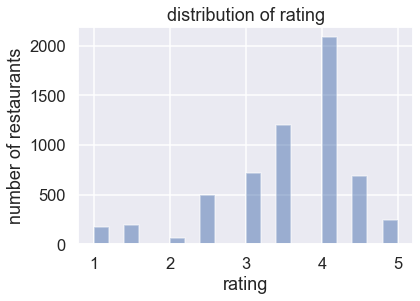

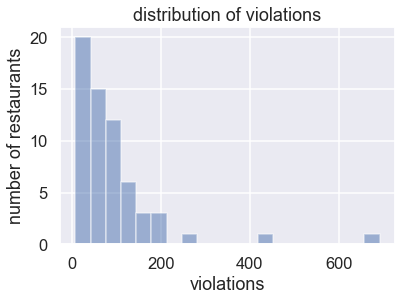

In [23]:
# Then we have some samples after combination
violations = my_health_and_rating_data['hsisid'].value_counts()
violations = violations.to_dict()
rating_data = dict(zip(my_health_and_rating_data['hsisid'], my_health_and_rating_data['rating']))

#We first visualize the distribution of the rating of the restaurants
ax = my_health_and_rating_data.hist(column = 'rating', bins=20, alpha=0.5)
f1 = plt.gcf()
for ax in ax.flatten():
    ax.set_xlabel("rating")
    ax.set_ylabel("number of restaurants")
    ax.set_title('distribution of rating')

#Then we visualize the distribution of the violations of the restaurants
violations_visual = pd.DataFrame(violations.values(), columns = ['violations'])

ax = violations_visual.hist(column = 'violations', bins=20, alpha=0.5)
f2 = plt.gcf()
for ax in ax.flatten():
    ax.set_xlabel("violations")
    ax.set_ylabel("number of restaurants")
    ax.set_title('distribution of violations')

Now we have seen the distribution of those two variables, and we could do more analysis about the correlation between the variables

In [24]:
x = []
y = []
# After we get the rating data, we could analysis the correlation between the two variables
for i in range(len(unique_id)):
    x.append(violations.get(unique_id[i]))
    y.append(rating_data.get(unique_id[i]))
print(x)
print(y)

[69, 42, 262, 87, 165, 139, 41, 99, 440, 85, 119, 10, 107, 184, 82, 60, 692, 148, 32, 25, 208, 96, 54, 35, 54, 164, 15, 126, 86, 68, 62, 133, 96, 129, 50, 112, 57, 36, 37, 68, 58, 68, 41, 68, 34, 93, 36, 45, 86, 90, 40, 108, 66, 213, 41, 50, 27, 33, 40, 8, 35, 25]
[4.0, 3.5, 3.5, 1.0, 1.0, 4.0, 3.0, 3.0, 4.0, 5.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 3.5, 1.5, 4.0, 4.0, 4.0, 3.0, 2.5, 1.0, 3.5, 4.0, 3.0, 3.0, 4.0, 4.0, 2.5, 4.5, 4.0, 4.0, 1.5, 4.0, 4.0, 4.0, 4.5, 2.5, 3.5, 3.0, 3.5, 4.0, 4.5, 2.5, 2.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 4.0, 1.5, 2.0, 4.0, 1.0, 4.0, 4.0, 3.5]


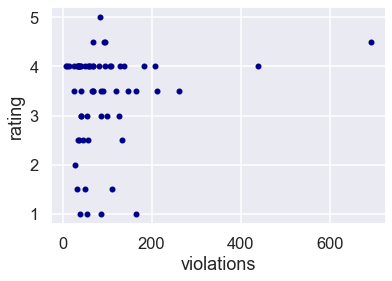

In [25]:
data_list = [x,y]
df = pd.DataFrame(data_list).transpose()
df.columns =  ['violations', 'rating']
df

ax1 = df.plot.scatter(x = 'violations',
                      y = 'rating',
                      c = 'DarkBlue')  #need title

In [26]:
df.corr()

,violations,rating
violations,1.000000,0.162556
rating,0.162556,1.000000


Then we could get the conclusion that the correlation between the variable 'violations' and 'rating' is not really high. We could assume that
those two vatiables are almost independent

But what about the correlation between the variable 'violations' and 'economic development' ? We need more advanced analysis

We have got the 'violations_income' dataset and we do some more analysis

First we see their distribution again

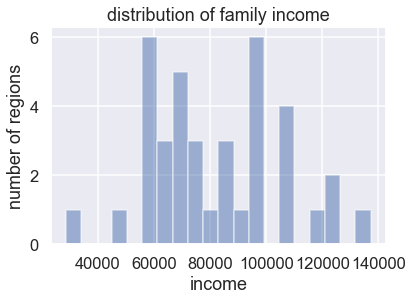

In [27]:
#We visualize the distribution of the income of different region again
ax = zipcodes_data.hist(column = 'median_family_income_dollars', bins=20, alpha=0.5)
f1 = plt.gcf()
for ax in ax.flatten():
    ax.set_xlabel("income")
    ax.set_ylabel("number of regions")
    ax.set_title('distribution of family income')



Different from noraml distribution but does not have a long tail in this distribution

Then we see the correlation and try to do some regression

In [28]:
violate_income_corr = violations_income['median_family_income_dollars'].value_counts()
violate_income_corr.head()

82292     12501
109736     9602
73715      8604
57419      8428
68608      8175
Name: median_family_income_dollars, dtype: int64

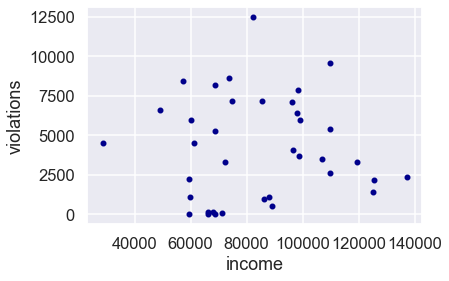

In [29]:
df = pd.DataFrame({'income':violate_income_corr.index, 'violations':violate_income_corr.values})
df
ax2 = df.plot.scatter(x = 'income',
                      y = 'violations',
                      c = 'DarkBlue')  #need title


In [30]:
df.corr()

,income,violations
income,1.000000,0.007545
violations,0.007545,1.000000


We have found that the correlation between those two variables is really weak. What will happen if we implement the regression method?

In [31]:
# YOUR CODE HERE
violations = df['violations']
income = df['income']
result = sm.ols(formula="violations ~ income", data=df).fit()
print(result.params)

Intercept    4090.310092
income          0.001010
dtype: float64


In [32]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             violations   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                  0.001993
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.965
Time:                        23:04:59   Log-Likelihood:                -351.13
No. Observations:                  37   AIC:                             706.3
Df Residuals:                      35   BIC:                             709.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4090.3101   1968.748      2.078      0.0

Then we can see that the p-value is really high (0.965). Our OLS regression is meaningless.

# Ethics & Privacy

Data permissions and concerns:

Actually, some datasets in this project have some information about the name, personal information of the inspectors and so on. In the data cleaning part, we have dropped the columns which contain those personal informaton.

Potential Biases:

Actually, this project tells us the family income and rating of those restaurants does not have a strong correlation with the variable isolations of the restaurants in the dataset. In fact, we assume that the rating of the restaurants could evaluate the performance of the restaurants, however, customers may not focus so much on the health inspection history and restaurant's violations when they take their meal. Customers may pay more attention to the taste of the food, the service quality and the price of their food, which may affect the rating a lot. As a result, the variable we choose may not correlate with the violations of the restaurants. 

# Conclusion & Discussion

This report explores the relationship between the restaurant's violation history and other variables, such as the family income, and the rating of the restaurants. However, the results seem to tell us that the variable we choose is not perfect. When we see the scatterplot, it seems that the variables are not correlated with the restaurant's violation history. 

Firstly, we should explore more variables in this dataset, such as the violation type, and the time of the violation to explore more information. In this report, only the family income and the rating information has been analysised, we gave up so much information in the dataset. 

Besides, when we combining the datasets, we found that the data has lost a lot. The information of rating system and the violation system do not match with each other. So we lost so much information which maybe useful for our analysis.

If possible, we should also find more datasets to do this analysis, which may improve our quality of analysis a lot.

